In [4]:
!wget https://raw.githubusercontent.com/TylerMyersWGU/HeartDiseasePredictor/main/Heart_Disease_Dataset_with_2000_Simulated_Rows.csv


--2025-06-24 23:14:17--  https://raw.githubusercontent.com/TylerMyersWGU/HeartDiseasePredictor/main/Heart_Disease_Dataset_with_2000_Simulated_Rows.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54480 (53K) [text/plain]
Saving to: ‘Heart_Disease_Dataset_with_2000_Simulated_Rows.csv’

Heart_Disease_Datas 100%[===================>]  53.20K  --.-KB/s    in 0.007s  

2025-06-24 23:14:18 (7.93 MB/s) - ‘Heart_Disease_Dataset_with_2000_Simulated_Rows.csv’ saved [54480/54480]



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import ipywidgets as widgets
from IPython.display import display, Markdown


In [6]:


# Load the dataset
df = pd.read_csv("Heart_Disease_Dataset_with_2000_Simulated_Rows.csv")

# Inspect the dataset
print(df.head())              # Preview the first few rows
print(df.info())              # Check structure and types
print(df.describe())          # Get summary statistics
print(df['HeartDisease'].value_counts())  # Class distribution


   Age  Gender  BloodPressure  Cholesterol  HeartRate  HeartDisease
0   68       1            105          191        107             1
1   58       0             97          249         89             0
2   44       0             93          190         82             1
3   72       1             93          183        101             1
4   37       0            145          166        103             1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            3010 non-null   int64
 1   Gender         3010 non-null   int64
 2   BloodPressure  3010 non-null   int64
 3   Cholesterol    3010 non-null   int64
 4   HeartRate      3010 non-null   int64
 5   HeartDisease   3010 non-null   int64
dtypes: int64(6)
memory usage: 141.2 KB
None
               Age       Gender  BloodPressure  Cholesterol    HeartRate  \
count  3010.000000  3010.0000

## 📊 Data Overview
We use a dataset containing 2510 patient records—500 real and 2,010 simulated—with attributes such as age, cholesterol, blood pressure, and more. The target variable is HeartDisease (1 = Yes, 0 = No). The original dataset included a synthetic QuantumPatternFeature, which has since been removed to focus on clinically interpretable features.



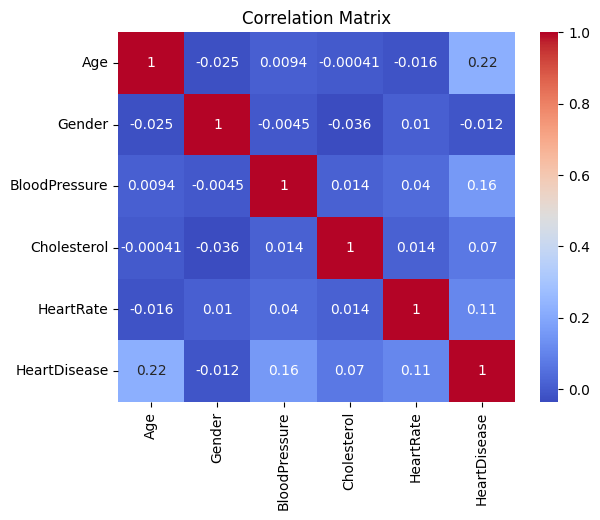

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


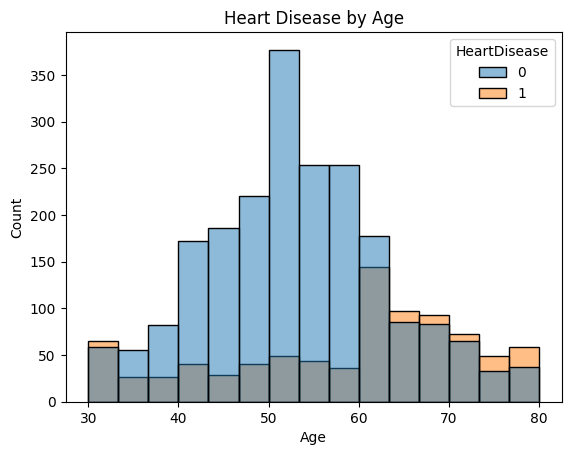

In [8]:
sns.histplot(data=df, x="Age", hue="HeartDisease", bins=15)
plt.title("Heart Disease by Age")
plt.show()


In [9]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Below youll find a visualization of the Random forrest classifer used to train the model

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       404
           1       0.78      0.66      0.72       198

    accuracy                           0.83       602
   macro avg       0.81      0.79      0.80       602
weighted avg       0.82      0.83      0.82       602



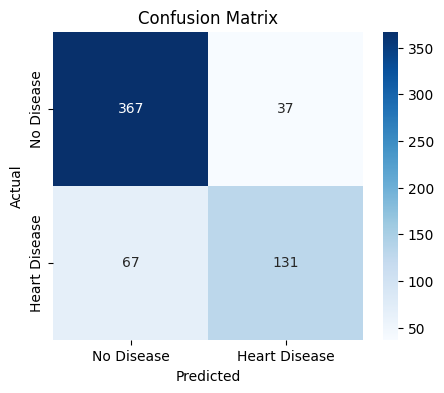

In [11]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## ✅ Model Evaluation
The Random Forest model achieved an accuracy of ~83% with balanced precision and recall. Above is the confusion matrix and classification report.


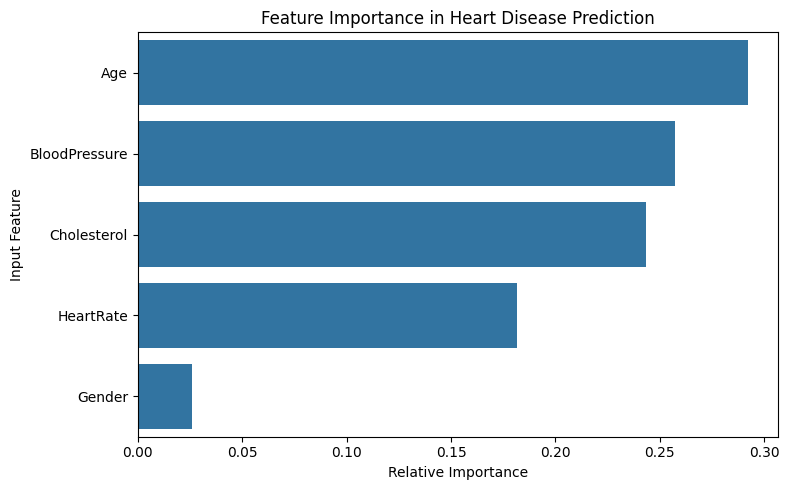

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare importances
importances = model.feature_importances_
features = X.columns

# DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature')  # Removed palette
plt.title('Feature Importance in Heart Disease Prediction')    # Removed emoji
plt.xlabel('Relative Importance')
plt.ylabel('Input Feature')
plt.tight_layout()
plt.show()

plt.show()


## 🎯 Interactive Heart Disease Risk Predictor
Use the sliders below to simulate patient data and instantly receive a prediction.


In [13]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, Markdown
from sklearn.ensemble import RandomForestClassifier

age = widgets.IntSlider(description="Age", min=20, max=80, value=50)
gender = widgets.Dropdown(description="Gender", options=[('Female', 0), ('Male', 1)])
bp = widgets.IntSlider(description="Blood Pressure", min=90, max=180, value=120)
chol = widgets.IntSlider(description="Cholesterol", min=150, max=300, value=200)
hr = widgets.IntSlider(description="Heart Rate", min=60, max=120, value=80)


output = widgets.Output()

btn = widgets.Button(description="Check Prediction", button_style="success")

def on_click(b):
    input_data = pd.DataFrame([[
        age.value,
        gender.value,
        bp.value,
        chol.value,
        hr.value,
    ]], columns=['Age', 'Gender', 'BloodPressure', 'Cholesterol', 'HeartRate'])

    result = model.predict(input_data)[0]

    with output:
        output.clear_output()
        if result == 1:
            display(Markdown("### 🎯 Result: 🔴 **Heart Disease Detected**"))
        else:
            display(Markdown("### 🎯 Result: 🟢 **No Heart Disease**"))

btn.on_click(on_click)

form = widgets.VBox([age, gender, bp, chol, hr, btn, output])
display(Markdown("## 🧠 Heart Disease Predictor"))
display(form)


## 🧠 Heart Disease Predictor